In [61]:
#import required libraries
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
#function to read prediction data file. Generally expeceted to have format of label,probability score
def read_pred_file(fl_name):
    df = pd.read_csv( fl_name)
    col1 = df.columns[0]
    print("[%d] records loaded from File[%s] " % (df[col1].count(),fl_name))
    
    return df

In [101]:
#set key variables.
ddir = '/disk1/data1/data/models/inception/'
#model_name = 'incep_v3_he_wce_w25.cpkt'
model_name = 'incep_v3_he.cpkt'
steps = '15999'
pred_df_fl = ddir + model_name + '-' + steps + '_df.csv'

In [102]:
#load data
pred_df = read_pred_file(pred_df_fl)

[74448896] records loaded from File[/disk1/data1/data/models/inception/incep_v3_he.cpkt-15999_df.csv] 


In [103]:
#check data
print("Data columns: ",pred_df.columns)
print(pred_df.head())

Data columns:  Index(['label', 'prob'], dtype='object')
   label      prob
0    0.0  0.005524
1    0.0  0.004265
2    0.0  0.004293
3    0.0  0.002902
4    0.0  0.004698


In [104]:
#calculate ROC specific details and plot the grpah
fpr, tpr, _ = metrics.roc_curve(pred_df.label,  pred_df.prob)
auc = metrics.roc_auc_score(pred_df.label,  pred_df.prob)
print("AUC - [%f]" % (auc))

AUC - [0.499955]


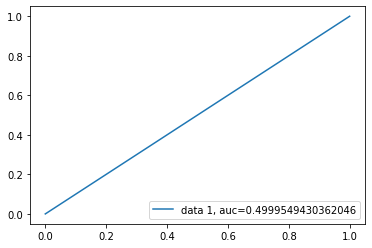

In [105]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [106]:
#Prepare predcition for confusion matrix. create prediction using optimal threshold, in our case threshold is .5
threshold = auc
#threshold = 0.1
pred_df['pred'] = pred_df.prob.apply(lambda x: 0. if x < threshold else 1.)

In [107]:
#print confusion matrix.
total = pred_df.label.count()

tot_1s = pred_df[(pred_df.label == 1.)]['label'].count()
tot_0s = pred_df[(pred_df.label == 0.)]['label'].count()
tp = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 1.)]['label'].count()
tn = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]['label'].count()
fp = pred_df[(pred_df.label == 0.) & (pred_df.pred == 1.)]['label'].count()
fn = pred_df[(pred_df.label == 1.) & (pred_df.pred == 0.)]['label'].count()
#print(" tp 1's : ",/tot_1s)
#print(" tp 0's : ",pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]['label'].count()/tot_0s)

In [108]:
'''------not weigthed CE-------
 tp:  200  fp:  13432
 fn:  1080852  tn:  73354412
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014671361502347418
 Recall:  0.00018500497663387146
 F1 score:  0.00036540225307029245
  ----------w=10---------
 tp:  67  fp:  4477
 fn:  1080985  tn:  73363367
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014744718309859154
 Recall:  6.197666717234694e-05
 F1 score:  0.00012343450049558032
 ----------w=25---------
  tp:  9087  fp:  617985
 fn:  1071965  tn:  72749859
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014491158909981629
 Recall:  0.00840570111335995
 F1 score:  0.01063974278213994
 ----------w=50---------
 tp:  26411  fp:  1791189
 fn:  1054641  tn:  71576655
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014530699823943663
 Recall:  0.024430832189385895
 F1 score:  0.018222953290012046
 ----------w=75---------
  tp:  55304  fp:  3748024
 fn:  1025748  tn:  69619820
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014540949400104329
 Recall:  0.051157576138798136
 F1 score:  0.022645248731671164
----------w=100---------
 tp:  98815  fp:  6703553
 fn:  982237  tn:  66664291
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014526558986517637
 Recall:  0.09140633383038003
 F1 score:  0.02506906900812084
'''
print(" tp: ",tp," fp: ",fp)
print(" fn: ",fn," tn: ",tn)
print(" Total labels 1's: ",tot_1s," Total labels 0's: ",tot_0s)
print(" % labels 1's: ",tot_1s/total," % labels 0's: ",tot_0s/total)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(" Precision: ",precision)
print(" Recall: ",recall)
print(" F1 score: ",2*precision*recall/(precision+recall))


 tp:  200  fp:  13432
 fn:  1080852  tn:  73354412
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014671361502347418
 Recall:  0.00018500497663387146
 F1 score:  0.00036540225307029245


In [87]:
print(pred_df.head())
print(pred_df.pred.unique())
print(pred_df.label.unique())

   label      prob  pred
0    0.0  0.479375   0.0
1    0.0  0.497975   0.0
2    0.0  0.499344   0.0
3    0.0  0.477318   0.0
4    0.0  0.454706   0.0
[0. 1.]
[0. 1.]


In [88]:
fp_df = pred_df[(pred_df.label == 0.) & (pred_df.pred == 1.)]
fp_df.prob.describe()

count    3.748024e+06
mean     5.066868e-01
std      6.023322e-03
min      5.000475e-01
25%      5.020679e-01
50%      5.049889e-01
75%      5.098623e-01
max      5.425791e-01
Name: prob, dtype: float64

In [89]:
fn_df = pred_df[(pred_df.label == 1.) & (pred_df.pred == 0.)]
fn_df.prob.describe()

count    1.025748e+06
mean     4.746065e-01
std      1.291293e-02
min      4.243577e-01
25%      4.656403e-01
50%      4.752563e-01
75%      4.841886e-01
max      5.000292e-01
Name: prob, dtype: float64

In [90]:
tn_df = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]
tn_df.prob.describe()


count    6.961982e+07
mean     4.746066e-01
std      1.291171e-02
min      4.243577e-01
25%      4.656393e-01
50%      4.752563e-01
75%      4.841857e-01
max      5.000292e-01
Name: prob, dtype: float64

In [91]:
tp_df = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 1.)]
tp_df.prob.describe()

count    55304.000000
mean         0.506684
std          0.006025
min          0.500048
25%          0.502068
50%          0.504989
75%          0.509862
max          0.542579
Name: prob, dtype: float64

In [ ]:
print(tn_df.head())
print(fn_df.head())
print(tn_df.prob.describe())
print(fn_df.prob.describe())